In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
overview_data = pd.read_csv("./datasets/train.csv")

In [3]:
overview_data.head()

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0   1      wax         6             4.0         unworn                 yes   
1   2      wax        20             4.0         unworn                 yes   
2   3      wax         6             3.0         unworn                 yes   
3   4      wax         6             2.5         unworn                  no   
4   5      wax        20             3.0         unworn                  no   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                      NaN  
4                      NaN

In [4]:
import re

## Data Preprocessing
* Getting the data together
* Read in the entier experimental data

In [7]:
from PIL import Image
# open method used to open different extension image file
im = Image.open(r"./datasets/test_artifact.jpg")
# This method will show image in any image viewer
im.show()

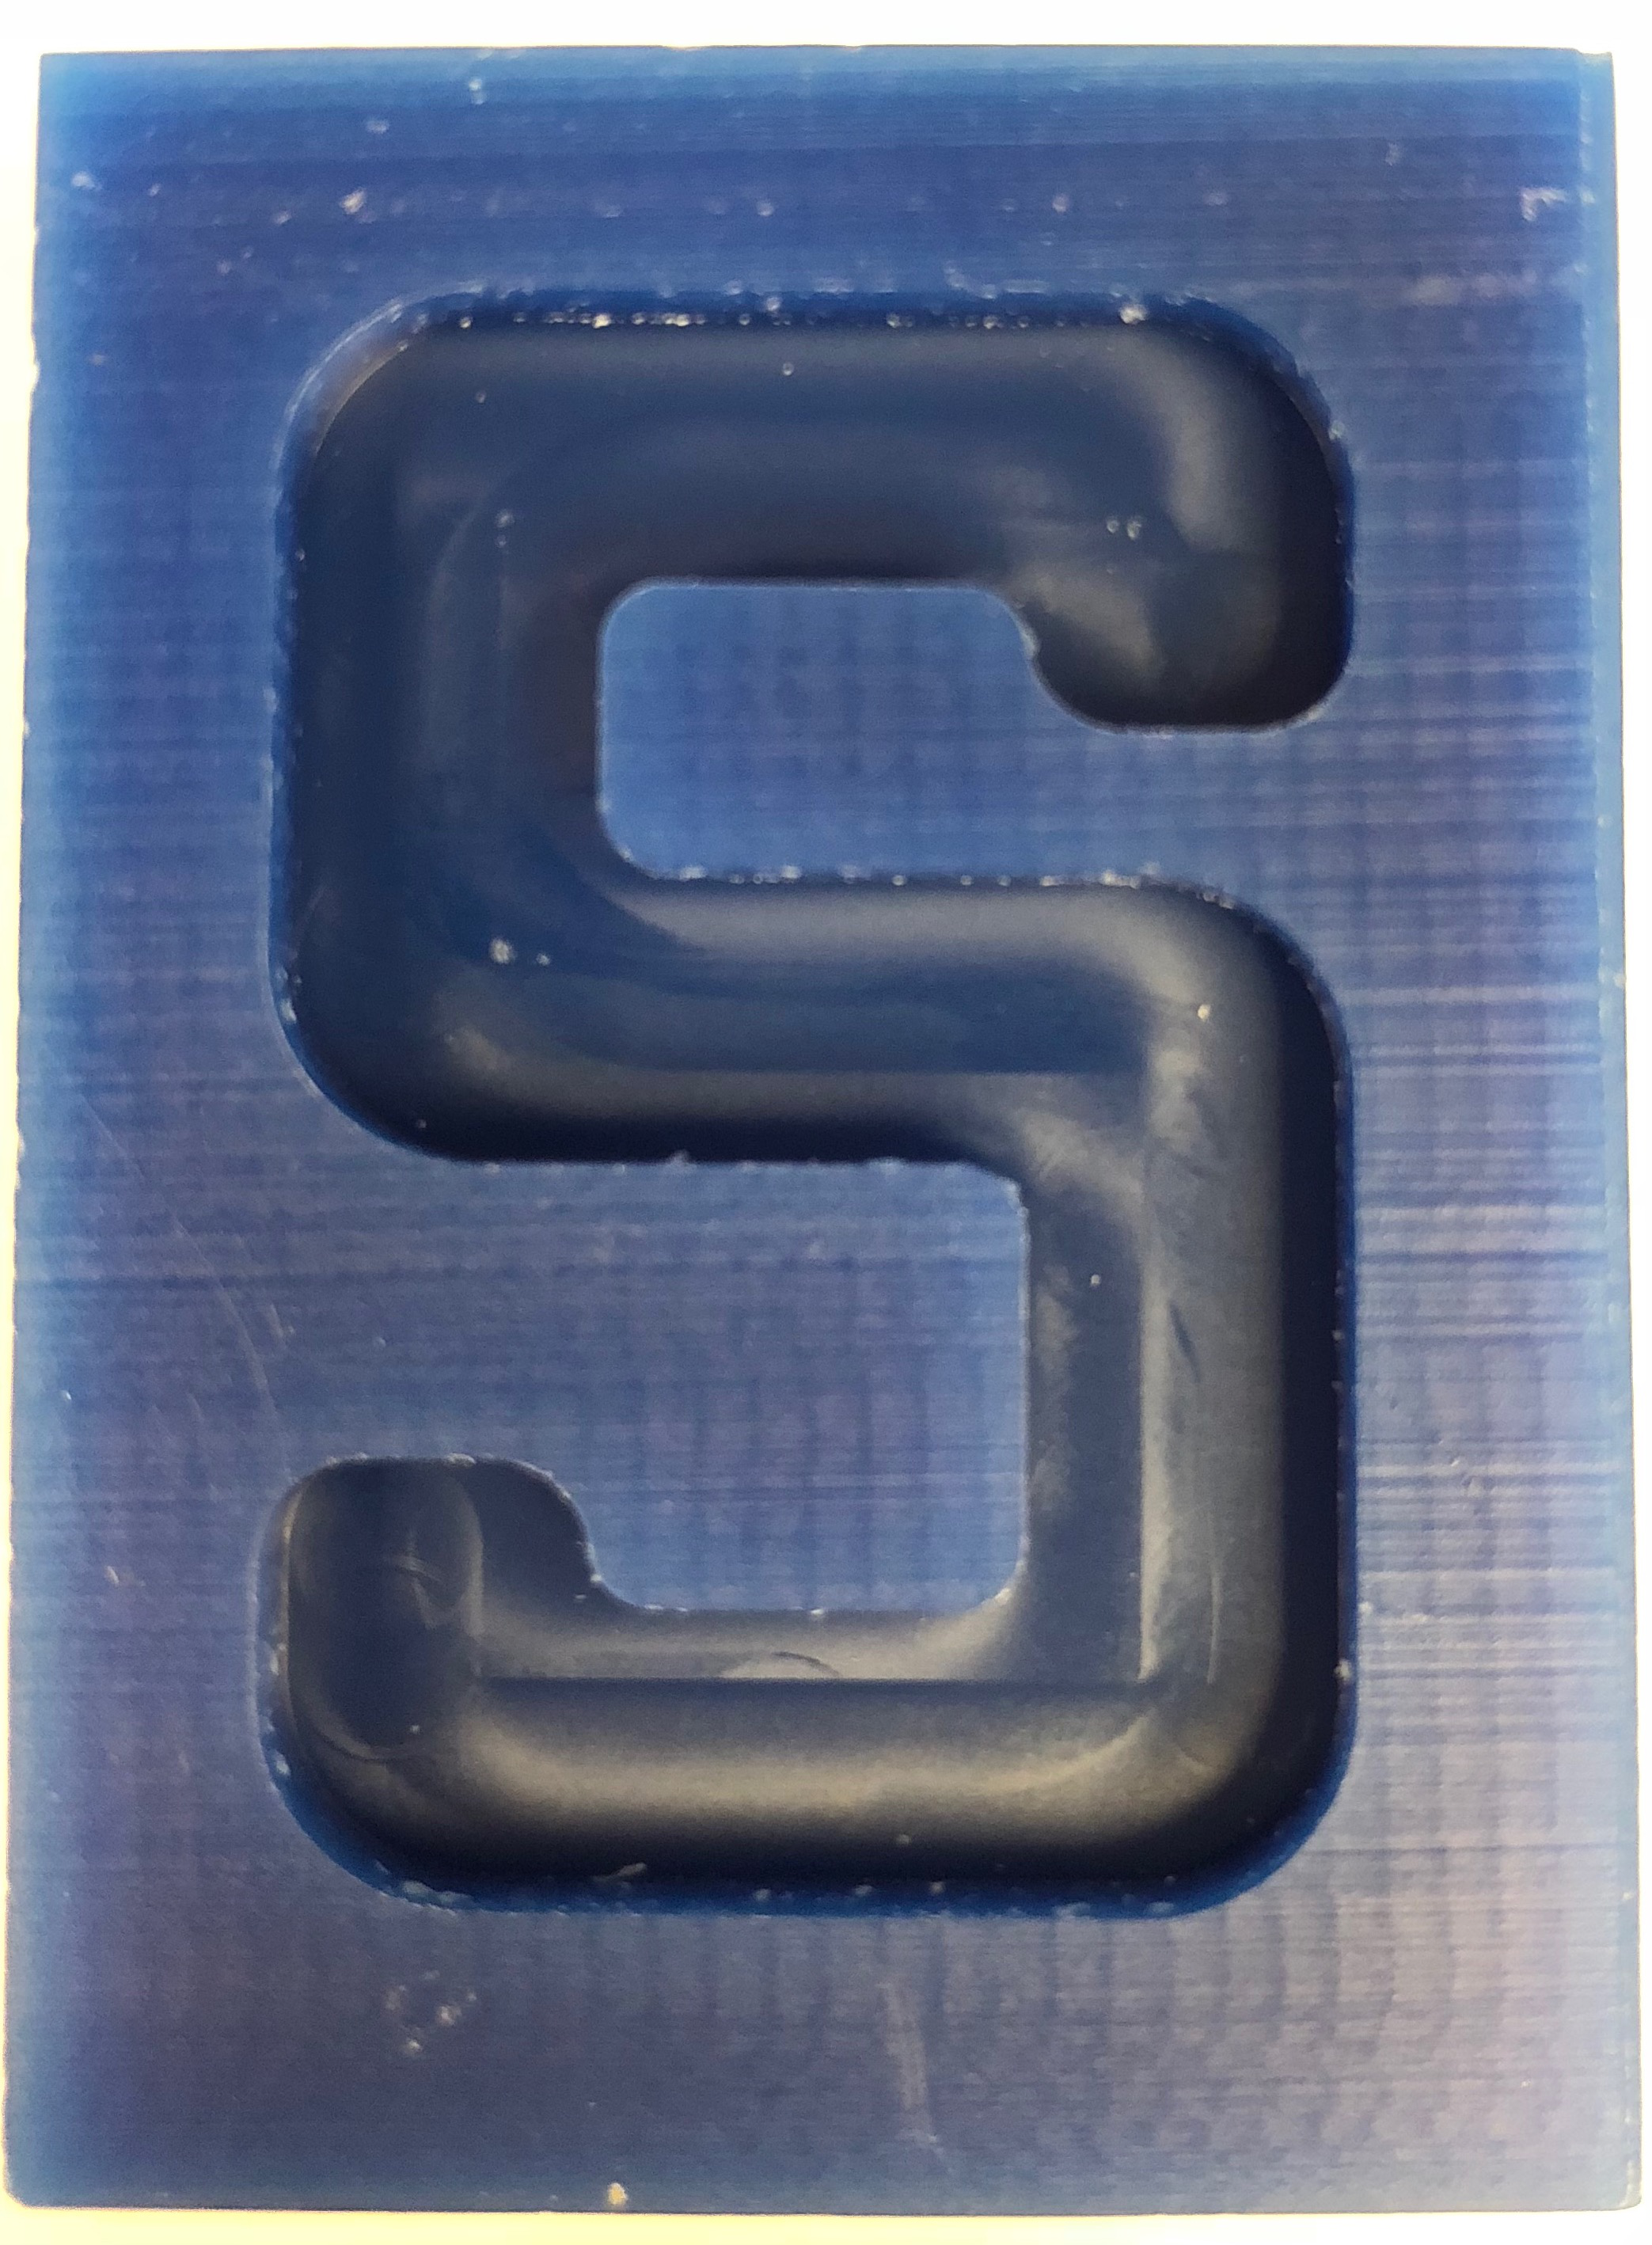

In [31]:
im

In [8]:
import os
filelist = os.listdir('./datasets')

df_list = []#pd.DataFrame()
for file in filelist:
    match = re.search("(?<=experiment_)\d{2}(?=\.csv)",file)
    if match:
        file_path = os.path.join('./datasets', file)
        temp = pd.read_csv(file_path)
        group = match.group()
        temp['experiment_No'] = int(group)
        df_list.append(temp) 
df = pd.concat(df_list)
            

In [9]:
df.head()

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   

   ...  S1_DCBusVoltage  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
0  ...     2.740000e-19             329.0               0.0    6.960000e-07   
1  ...     2.740000e-19             328.0               0.0   -5.270000e-07   
2  ...     2.740000e-19             328.0               0.0    9.100000e-07   
3  ...     2.740000e-19             328.0               0.0    1.070000e-06   
4  ...     2.740000e-19             328.0               0.0    1.960000e-06   

   S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
0              12.0                        1.0                 0.0   
1              12.0                        1.0                 4.0   
2              12.0                        1.0                 7.0   
3              12.0                        1.0                 7.0   
4              12.0                        1.0                 7.0   

   M1_CURRENT_FEEDRATE  Machining_Process  experiment_No  
0                 50.0           Starting              1  
1                 50.0               Prep              1  
2                 50.0               Prep              1  
3                 50.0               Prep              1  
4                 50.0               Prep              1  

[5 rows x 49 columns]

In [10]:
df.shape

(25286, 49)

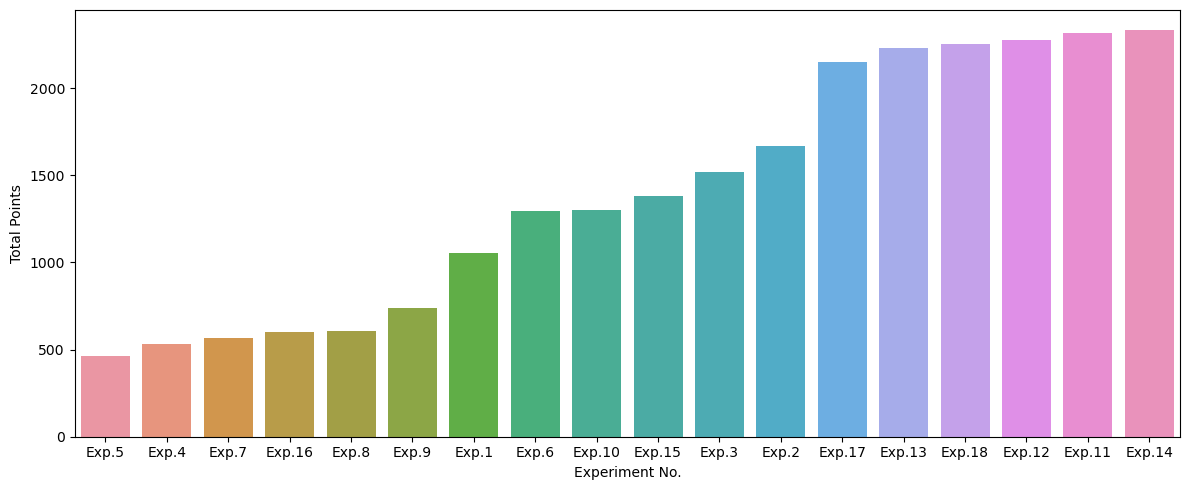

In [11]:
plt.figure(figsize=(12, 5))
summary = df['experiment_No'].value_counts().sort_values().to_frame()
exp = list(map(lambda val: f"Exp.{val}", summary.index))
counts = summary['experiment_No']
sns.barplot(x=exp, y=counts)
plt.xlabel("Experiment No.")
plt.ylabel("Total Points");
plt.tight_layout()

##### Data Cleaning

In [12]:
overview_data.isna().sum()

No                          0
material                    0
feedrate                    0
clamp_pressure              0
tool_condition              0
machining_finalized         0
passed_visual_inspection    4
dtype: int64

In [13]:
df.isna().sum()

X1_ActualPosition            0
X1_ActualVelocity            0
X1_ActualAcceleration        0
X1_CommandPosition           0
X1_CommandVelocity           0
X1_CommandAcceleration       0
X1_CurrentFeedback           0
X1_DCBusVoltage              0
X1_OutputCurrent             0
X1_OutputVoltage             0
X1_OutputPower               0
Y1_ActualPosition            0
Y1_ActualVelocity            0
Y1_ActualAcceleration        0
Y1_CommandPosition           0
Y1_CommandVelocity           0
Y1_CommandAcceleration       0
Y1_CurrentFeedback           0
Y1_DCBusVoltage              0
Y1_OutputCurrent             0
Y1_OutputVoltage             0
Y1_OutputPower               0
Z1_ActualPosition            0
Z1_ActualVelocity            0
Z1_ActualAcceleration        0
Z1_CommandPosition           0
Z1_CommandVelocity           0
Z1_CommandAcceleration       0
Z1_CurrentFeedback           0
Z1_DCBusVoltage              0
Z1_OutputCurrent             0
Z1_OutputVoltage             0
S1_Actua

In [14]:
overview_data.No.dtype

dtype('int64')

In [15]:
df.experiment_No.dtype

dtype('int64')

In [16]:
data = df.merge(right=overview_data, how='inner', left_on='experiment_No', right_on='No')

In [17]:
data.shape

(25286, 56)

In [18]:
data.isna().sum()

X1_ActualPosition               0
X1_ActualVelocity               0
X1_ActualAcceleration           0
X1_CommandPosition              0
X1_CommandVelocity              0
X1_CommandAcceleration          0
X1_CurrentFeedback              0
X1_DCBusVoltage                 0
X1_OutputCurrent                0
X1_OutputVoltage                0
X1_OutputPower                  0
Y1_ActualPosition               0
Y1_ActualVelocity               0
Y1_ActualAcceleration           0
Y1_CommandPosition              0
Y1_CommandVelocity              0
Y1_CommandAcceleration          0
Y1_CurrentFeedback              0
Y1_DCBusVoltage                 0
Y1_OutputCurrent                0
Y1_OutputVoltage                0
Y1_OutputPower                  0
Z1_ActualPosition               0
Z1_ActualVelocity               0
Z1_ActualAcceleration           0
Z1_CommandPosition              0
Z1_CommandVelocity              0
Z1_CommandAcceleration          0
Z1_CurrentFeedback              0
Z1_DCBusVoltag

We are going to remove some columns that won't be used in this experiment. Such features are that ordinarily will not be required to determine if a tool will wear out or they can't be determined before knowing if a tool as worn out. This will be removed to avoid data leakage

Separate the categorical variable

In [19]:
cats = data.select_dtypes(include='object')
cats.head()

Machining_Process material tool_condition machining_finalized  \
0          Starting      wax         unworn                 yes   
1              Prep      wax         unworn                 yes   
2              Prep      wax         unworn                 yes   
3              Prep      wax         unworn                 yes   
4              Prep      wax         unworn                 yes   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                      yes  
4                      yes

We  should understad that we are trying to predict the tool conmdition, if it will worn out based on the other explainaotory variable. Therefore the column `tool_condition` can not be part of the features.

So we only have two categorical feature

In [20]:
cats['material'].value_counts()

wax    25286
Name: material, dtype: int64

* Look above we see that there is just onevalue for the material type. This show that we won't be using this colum  in our experiment as it does not provide any insight into the data and may be redundance to our predictive model
* The `machine_finalized`, `passed_visual_inspection` are columns that can only be known after machine operation and will be removed from the features.

In [21]:
removable = ['machining_finalized', 'passed_visual_inspection', 'experiment_No', 'No', 'material']
data = data.drop(removable, axis=1)

**Note:** It should be noted that the `experiment_No` `No` are removed as they are not needed as explanatory variables. The were there just to link the overview data and the experimental data together.

We convert the taret column into numbers using LabelEncdoder

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
encoder = LabelEncoder()
label = encoder.fit_transform(data['tool_condition'])

In [23]:
print(encoder.classes_)

# unworn : 0
# worn : 1

data['tool_condition'] = label

['unworn' 'worn']


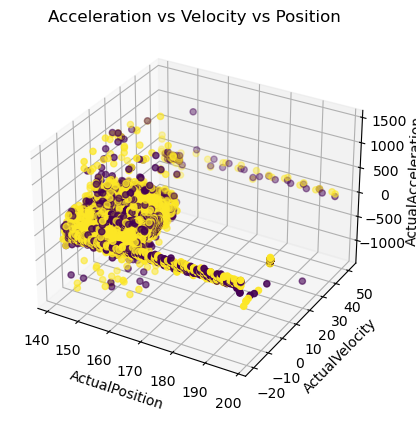

In [144]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
x = data['X1_ActualPosition']
y = data['X1_ActualVelocity']
z = data['X1_ActualAcceleration']
c = data['tool_condition']
ax.scatter(x, y, z, c = c)
ax.set_xlabel('ActualPosition')
ax.set_ylabel('ActualVelocity')
ax.set_zlabel('ActualAcceleration')

# syntax for plotting
ax.set_title('Acceleration vs Velocity vs Position')
plt.show()


In [24]:
unq = []
for col in data.columns:

    if data[col].nunique() == 1:
        unq.append(col)

In [25]:
unq

['Z1_CurrentFeedback',
 'Z1_DCBusVoltage',
 'Z1_OutputCurrent',
 'Z1_OutputVoltage',
 'S1_SystemInertia']

The above columns will be dropped out of the dataframe as they have only one value which does not add value to our analysis

In [26]:
data = data.drop(unq, axis=1)

In [27]:
data.head()

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   

   ...  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
0  ...             329.0               0.0    6.960000e-07   
1  ...             328.0               0.0   -5.270000e-07   
2  ...             328.0               0.0    9.100000e-07   
3  ...             328.0               0.0    1.070000e-06   
4  ...             328.0               0.0    1.960000e-06   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 0.0                 50.0   
1                        1.0                 4.0                 50.0   
2                        1.0                 7.0                 50.0   
3                        1.0                 7.0                 50.0   
4                        1.0                 7.0                 50.0   

   Machining_Process  feedrate  clamp_pressure  tool_condition  
0           Starting         6             4.0               0  
1               Prep         6             4.0               0  
2               Prep         6             4.0               0  
3               Prep         6             4.0               0  
4               Prep         6             4.0               0  

[5 rows x 46 columns]

we are left with `machining process` which is still a categprical column. We will explore it and convert the categorical vaules to numerical values.

In [28]:
data['Machining_Process'].unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

In [29]:
encode = {'Starting':1, 'Prep':1, 'Layer 1 Up': 2.1, 'Layer 1 Down':2.0, 'Repositioning':0,
       'Layer 2 Up':3.1, 'Layer 2 Down':3.0, 'Layer 3 Up':4.1, 'Layer 3 Down':4.0,
      'end':-1, 'End':-1}

In [30]:
encode

{'Starting': 1,
 'Prep': 1,
 'Layer 1 Up': 2.1,
 'Layer 1 Down': 2.0,
 'Repositioning': 0,
 'Layer 2 Up': 3.1,
 'Layer 2 Down': 3.0,
 'Layer 3 Up': 4.1,
 'Layer 3 Down': 4.0,
 'end': -1,
 'End': -1}

In [31]:
data['Machining_Process'] = data['Machining_Process'].map(encode)

In [32]:
data.describe()

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean          159.052045          -0.288657               0.094264   
std            19.330873           5.658260              93.877623   
min           141.000000         -20.400000           -1280.000000   
25%           145.000000          -2.050000             -31.300000   
50%           153.000000           0.000000               0.000000   
75%           162.000000           0.200000              25.000000   
max           198.000000          50.700000            1440.000000   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
count        25286.000000        25286.000000            25286.000000   
mean           159.050700           -0.283076                0.253215   
std             19.331144            5.664309               72.594951   
min            141.000000          -20.000000            -1000.000000   
25%            145.000000           -2.050000                0.000000   
50%            153.000000            0.000000                0.000000   
75%            162.000000            0.000000                0.000000   
max            198.000000           50.000000             1000.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
count        25286.000000     2.528600e+04      25286.000000   
mean            -0.469714     6.603073e-02        326.945859   
std              4.220750     3.700384e-02          1.459937   
min            -23.400000     2.780000e-19        320.000000   
25%             -3.930000     4.150000e-02        326.000000   
50%             -0.666000     6.680000e-02        327.000000   
75%              3.140000     9.130000e-02        327.000000   
max             27.100000     3.800000e-01        331.000000   

       X1_OutputVoltage  ...  S1_OutputCurrent  S1_OutputVoltage  \
count      25286.000000  ...      25286.000000      25286.000000   
mean           7.986942  ...        322.784505         85.479195   
std            7.710379  ...          4.293571         52.531863   
min            0.000000  ...        290.000000          0.000000   
25%            2.590000  ...        320.000000          0.000000   
50%            7.140000  ...        322.000000        117.000000   
75%           10.200000  ...        327.000000        119.000000   
max           75.400000  ...        332.000000        130.000000   

       S1_OutputPower  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
count    25286.000000               25286.000000        25286.000000   
mean         0.127405                   1.003441           47.345013   
std          0.080753                   0.349055           43.826214   
min         -0.002960                   0.000000            0.000000   
25%          0.000005                   1.000000            2.000000   
50%          0.164000                   1.000000           39.000000   
75%          0.183000                   1.000000           85.000000   
max          0.569000                   4.000000          135.000000   

       M1_CURRENT_FEEDRATE  Machining_Process      feedrate  clamp_pressure  \
count         25286.000000       25286.000000  25286.000000    25286.000000   
mean             16.542039           2.023622      7.123942        3.368168   
std              19.620219           1.624037      6.167036        0.615639   
min               3.000000          -1.000000      3.000000        2.500000   
25%               3.000000           1.000000      3.000000        3.000000   
50%               6.000000           2.100000      3.000000        3.000000   
75%              20.000000           3.100000      6.000000        4.000000   
max              50.000000           4.100000     20.000000        4.000000   

       tool_condition  
count    25286.000000  
mean         0.526299  
std          0.499318  
min          0.000000  
25%          0.000000  
50%          1.000000  

<Axes: >

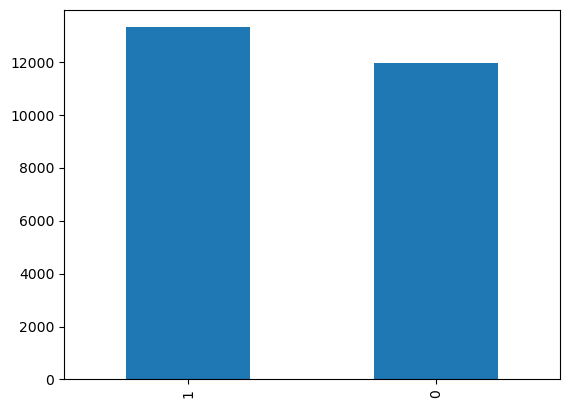

In [170]:
data['tool_condition'].value_counts().plot.bar()

In [33]:
data['tool_condition'].value_counts()

1    13308
0    11978
Name: tool_condition, dtype: int64

### Data Segmentation
Here, we seaprate the fatures from the target variable (`tool_wear`)

In [34]:
labels = data['tool_condition']
features = data.drop('tool_condition', axis=1)

features.shape, labels.shape

((25286, 45), (25286,))

We hae a total of 45 Predictive features to be used to predict the too_wear condiotn

### Data Splitting

Here we are going to separate the train, test and validatio sets
The train-test ratio  is 80:20 and the train-validation ratio is 75:25 (75%:25%) of the 80% of the train data from the train:test splitting

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=12)

# Split the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=12)

In [36]:
X_train.shape, X_test.shape, X_val.shape

((15171, 45), (5058, 45), (5057, 45))

In [37]:
y_train.shape, y_test.shape, y_val.shape

((15171,), (5058,), (5057,))

### Data Scaling
Here we scale the data using standard scaler. Because we are going to be using linear models which are very sensitive to the scale of values. We will be scaling our data using the standard scaler so that all the values in the dataframe are within the same scale

A bref explanation on standard scaler is provided under the appendix section

In [38]:
scaler = StandardScaler()

def scale(scaler, data, scaled=True):
    if scaled == True:
        scaled_data = scaler.transform(data)
    
    else:
        scaled_data = scaler.fit_transform(data)
        
    cols = data.columns
    index = data.index
    scaled_df = pd.DataFrame(scaled_data, columns=cols, index=index)
    
    return scaled_df, scaler

In [39]:
scaled_train, scaler = scale(scaler, X_train, scaled=False)
scaled_test, scaler = scale(scaler, X_test)
scaled_val, scaler = scale(scaler, X_val) 

### Modelling

Here we build two models to predict the tool wearing of a mechanical equipment

* **Logistic Regression**: This a very basic and traditional machine learning  model which tries to fit a line in the data points that reduces the sum of errors.The output of the Logistic regresion is discrete because of the signmoid gunction which computes the output into 1s and 0s

* **Mulilayer Perceptron**: Multilayer Perceptron is a feed forward neural network (FNN) or otherwise called Artificial Neural Network (ANN). It is deep learning technique which tries to reach a solution by optimization some objective function.


**Note**: More explanation on Linear regression and Nueral network are provided in the appendix section

In [53]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import KFold

from sklearn.metrics import f1_score, precision_score, precision_recall_curve, recall_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc

In [42]:
from warnings import filterwarnings
filterwarnings('ignore')
log_model = LogisticRegression(random_state=12)
log_model.fit(scaled_train, y_train)

LogisticRegression(random_state=12)

In [78]:
def evaluate(y_true,y_preds, y_proba=None):
    print(classification_report(y_true, y_preds, digits=4))
    sns.heatmap(confusion_matrix(y_true, y_preds), annot=True)
    
    if y_proba != None:
        fpr, tpr, _ = precision_recall_curve(y_true, y_proba)
        sns.lineplot(fpr, tpr)
        plt.xlabel("False Potive Rate")
        plt.ylabel("True Positivie rate")
        plt.title("Precsion Recal Curve")
    

In [207]:
log_preds = log_model.predict(scaled_val)

              precision    recall  f1-score   support

           0     0.5719    0.5270    0.5485      2385
           1     0.6055    0.6478    0.6259      2672

    accuracy                         0.5909      5057
   macro avg     0.5887    0.5874    0.5872      5057
weighted avg     0.5896    0.5909    0.5894      5057



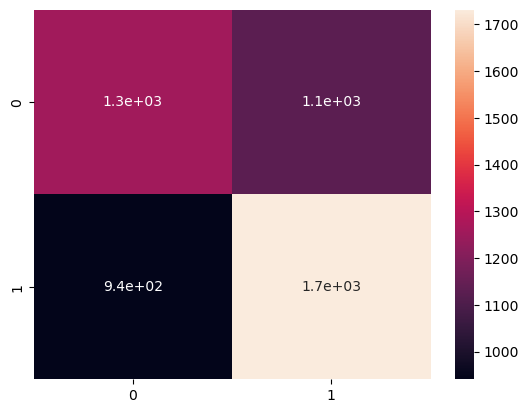

In [208]:
evaluate(y_val, log_preds)

In [223]:
mlp_model = MLPClassifier()

mlp_model1 = mlp = MLPClassifier(
    hidden_layer_sizes=(150,10),  # Example: 2 hidden layers with 100 and 50 neurons, adjust as needed
    activation='relu',             # Activation function for hidden layers
    solver='adam',                 # Optimization algorithm
    alpha=0.0001,                   # L2 regularization term              
    random_state=12,
    early_stopping=True,            # Enable early stopping to prevent overfitting
    n_iter_no_change=10,            # Number of iterations with no improvement on the validation set to stop training
)
mlp_model1.fit(scaled_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(150, 10),
              random_state=12)

In [224]:
mlp_preds = mlp_model1.predict(scaled_val)

              precision    recall  f1-score   support

           0     0.8747    0.8843    0.8795      2385
           1     0.8957    0.8870    0.8913      2672

    accuracy                         0.8857      5057
   macro avg     0.8852    0.8856    0.8854      5057
weighted avg     0.8858    0.8857    0.8857      5057



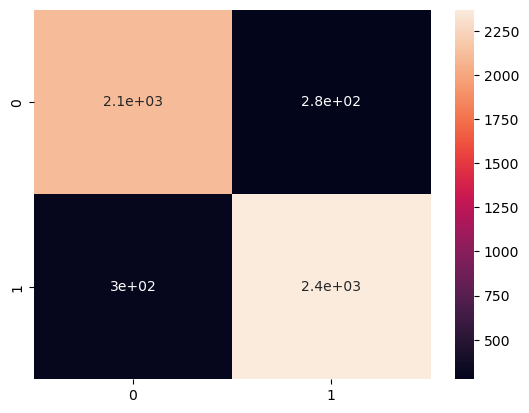

In [225]:
evaluate(y_val, mlp_preds)

              precision    recall  f1-score   support

           0     0.8897    0.8660    0.8777      2366
           1     0.8849    0.9056    0.8951      2691

    accuracy                         0.8871      5057
   macro avg     0.8873    0.8858    0.8864      5057
weighted avg     0.8871    0.8871    0.8870      5057



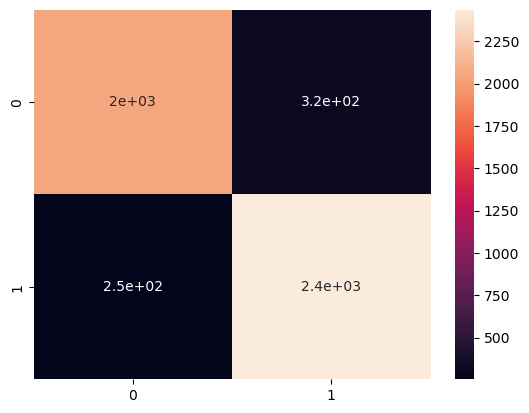

In [199]:
evaluate(y_val, mlp_preds)

In [66]:
light = LGBMClassifier(random_seed=12,  verbose=0)

In [67]:
light.fit(X_train, y_train,)

LGBMClassifier(random_seed=12, verbose=0)

In [46]:
light_preds = light.predict(X_val)

              precision    recall  f1-score   support

           0     0.9954    0.9937    0.9945      2385
           1     0.9944    0.9959    0.9951      2672

    accuracy                         0.9949      5057
   macro avg     0.9949    0.9948    0.9948      5057
weighted avg     0.9949    0.9949    0.9949      5057



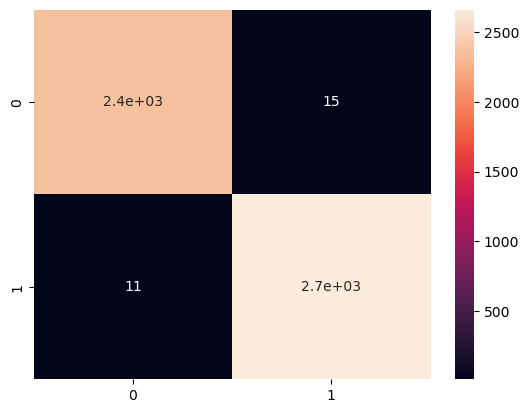

In [47]:
evaluate(y_val, light_preds)

### Using Genetic Algorithm

In [52]:
np.random.seed(12)
#X_sample = .sample(frac=0.4, random_state=12)
#indices = X_sample.index
#y_sample = y.loc[indices]

all_features = X_train.columns

In [48]:
# import deap models for evolution algorithm
from deap import base, tools, creator, algorithms
import random
import array
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
# we create a fitness function with a postive weight initialized since we are trying to maximaze the score. We will be using
# r2 score as a base score for the fitness fuction

creator.create('FitnessMax', base.Fitness, weights=(1.0,))

# We initialize the individual size (This will be the number of total features in the data)
indi_size = scaled_train.shape[1]

# We create an individual with blank features and the fitness function above. An individual is also considered as chromsomes
creator.create('Individual', array.array, fitness=creator.FitnessMax, typecode='d')

# create an Evolution strategy 
creator.create('Strategy', array.array, typecode='d')

# define a function to compute the individuals

def init_es(indiv, strat,size, ind_min, ind_max, strat_min, strat_max):
    
    ind = indiv(np.random.randint(ind_min, ind_max) for _ in range(size))
    ind.strategy = strat(np.random.randint(strat_min, strat_max) for _ in range(size))
    
    return ind
    
# We instantiate a toolbox. All operators will be registered in the toolbox

toolbox = base.Toolbox()

# We register a random number generator to generate 1s and 0s which will represent the presence and absence of a feature

#toolbox.register('feat_bin', np.random.randint, 0, 2)

# Insert values in individuals based on the output of the random generator
# All individuals will have same length of feature binaries in them
# initRepeat argument is used to initialize the individual
# We register the individual in the tool box

min_ind, max_ind = 0, 2
min_strat, max_strat = 0, 2


toolbox.register('individual', init_es, creator.Individual, creator.Strategy, indi_size, 
                min_ind, max_ind, min_strat, max_strat)
#toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.feat_bin, n=indi_size)

# Define a population with the individuals created above
# Register the population in toolbox
# initRepeat argument is used to initialize the population

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [51]:
ind = toolbox.individual()
print("Total no. of features/length of each chromosome = ", indi_size)
print(ind)

Total no. of features/length of each chromosome =  45
Individual('d', [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0])


In [68]:
def evaluate(individual):
    # check if there is atleast one feature in an individual
    sum_feats = sum(individual)
    if sum_feats == 0:
        return 0 # if there is no feature in an individual we return 0 score to indicate a very poor fitness of the chormosome
    else:
        feat_bool = np.array(individual).astype(bool)
        
        subset = all_features[feat_bool]
        
        X_subset_train = X_train[subset]
        X_subset_val = X_val[subset]

        
        # Build Random Forest
        
        lgbm =LGBMClassifier(random_seed=12,  verbose=0)
        lgbm.fit(X_subset_train, y_train)
        y_preds = lgbm.predict(X_subset_val)
    
        
        # Evaluate
        score = accuracy_score(y_val, y_preds)
        
        return (score, )

In [69]:
toolbox.register('mate', tools.cxESTwoPoint)

# Bit flip mutation The indpb argument is the probability of each attribute to be flipped

toolbox.register('mutate', tools.mutFlipBit, indpb=0.01)

# Select the best individual among tournsize randomly chosen individuals
toolbox.register('select', tools.selTournament, tournsize=23)

# We register the fitness/evaluation function defined above
toolbox.register('evaluate', evaluate)

# We will define the statistics to be displayed when search is running
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Max', np.max)
stats.register('Mean', np.mean)
stats.register('Min', np.min)

In [70]:
def run_ga(stats, toolbox):
    # We initiate a population size of 54 (4x total feature size)
    pop = toolbox.population(54)

    # Below HallOfFame argument saves k best individual across all the generations
    # We will use this to determine our final variable combination. 
    # We are taking only the first best one. It is possible to save k number of best solution in hof

    hof = tools.HallOfFame(1)

    # We will run the algorihtm using the eaSimple tool provided in DEAP. In the eaSimple function we pass the below arguents
    # pop: Population defined earlier
    # toolbox: toolbox containing all the operator defined
    # cxpb: The probability of mating two individuals.
    # mutpb: The probability of mutating an individual. We are keeping it high to show the impact
    # ngen: The number of generation.

    pop, log = algorithms.eaSimple(pop, 
                              toolbox,
                              cxpb=0.5,
                              mutpb=0.3,
                              ngen=30,
                              halloffame=hof,
                              stats=stats)
    
    return hof, pop, log



In [71]:
hof, pop, log = run_ga(stats, toolbox)

gen	nevals	Max     	Mean   	Min     
0  	54    	0.995056	0.96672	0.776745
1  	40    	0.995254	0.9945 	0.991497
2  	34    	0.996243	0.995225	0.993672
3  	37    	0.996836	0.995822	0.994265
4  	39    	0.996836	0.996206	0.994661
5  	39    	0.996836	0.996627	0.995254
6  	28    	0.996836	0.996752	0.995452
7  	36    	0.996836	0.99669 	0.995056
8  	31    	0.996836	0.996807	0.99565 
9  	39    	0.996836	0.996602	0.993079
10 	39    	0.996836	0.996638	0.995056
11 	35    	0.996836	0.996657	0.989124
12 	35    	0.996836	0.996748	0.995056
13 	30    	0.996836	0.996745	0.995056
14 	38    	0.996836	0.996715	0.994859
15 	37    	0.996836	0.996561	0.989124
16 	32    	0.996836	0.996649	0.995452
17 	31    	0.996836	0.996759	0.994661
18 	34    	0.996836	0.996785	0.995254
19 	34    	0.996836	0.996781	0.995847
20 	36    	0.996836	0.996616	0.989124
21 	36    	0.996836	0.996726	0.99565 
22 	28    	0.996836	0.996638	0.989124
23 	38    	0.996836	0.996499	0.989124
24 	43    	0.996836	0.996602	0.994661
25 	34    	0.99

In [72]:
best = hof.items[0]

print('Best Individual', best)
print('Best Fitness', best.fitness.values)

Best Individual Individual('d', [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0])
Best Fitness (0.9968360688155032,)


In [75]:
arr_bool = np.array(list(best)).astype(bool)
best_features = all_features[arr_bool]
print(best_features)
print(len(best_features))
best_data = data[best_features]
#pd.concat([best_data, y_train.to_frame()], axis=1).to_csv('energy_best_feats_all_models_05.csv', index=False)

Index(['X1_ActualVelocity', 'X1_CommandVelocity', 'X1_CurrentFeedback',
       'X1_OutputCurrent', 'Y1_ActualVelocity', 'Y1_ActualAcceleration',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_CommandPosition',
       'Z1_CommandAcceleration', 'S1_ActualPosition', 'S1_ActualVelocity',
       'S1_CurrentFeedback', 'S1_OutputCurrent', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_CURRENT_FEEDRATE', 'Machining_Process', 'feedrate',
       'clamp_pressure'],
      dtype='object')
22


In [76]:
X_best_train = X_train[best_features]
X_best_val = X_val[best_features]
X_best_test = X_test[best_features]


              precision    recall  f1-score   support

           0     0.9971    0.9962    0.9966      2385
           1     0.9966    0.9974    0.9970      2672

    accuracy                         0.9968      5057
   macro avg     0.9968    0.9968    0.9968      5057
weighted avg     0.9968    0.9968    0.9968      5057



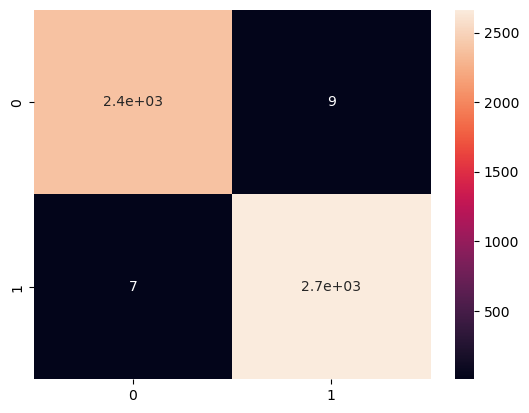

In [80]:
light = LGBMClassifier(random_seed=12,  verbose=0)
light.fit(X_best_train, y_train,)
light_preds = light.predict(X_best_val)
evaluate(y_val, light_preds)

## Appendix

### Standard Scaler: A Quick Explanation
Standard scaler is a widely used data preprocessing technique in machine learning. It helps to standardize the features of your dataset by centering them around zero mean and scaling them to unit variance. This makes the features comparable and improves the performance of many machine learning algorithms.

Here's a breakdown of how it works:

* Centering: For each feature, the mean value is calculated and then subtracted from each data point. This shifts the distribution of each feature so that its mean becomes zero.

* Scaling: The standard deviation of each feature is calculated. Then, each data point is divided by the corresponding standard deviation. This scales the distribution of each feature so that its standard deviation becomes one.

The formula for standard scaler can be expressed as:

>>>>> Z = (x - μ) / σ

where:

>  Z is the standardized value\
> x is the original data point\
> μ is the mean of the feature\
> σ is the standard deviation of the feature\


**Benefits of using Standard Scaler**:

Improves the performance of many machine learning algorithms, especially those sensitive to the scale of the data.
Makes it easier to interpret the coefficients of linear models.
Reduces the impact of outliers on the model.



### Logistic Regression: Predicting Binary Outcomes

Logistic regression is a statistical method used to model the probability of a binary event occurring. This makes it a powerful tool for classification problems where you want to predict whether a data point belongs to one category or another, such as spam vs. not spam, cancer vs. no cancer, or customer churn vs. no churn.

Here's a breakdown of how it works:

Logit Transformation: The log-odds of the event occurring are calculated using a linear combination of the independent variables.
Probability Estimation: The log-odds are then transformed back to a probability using the sigmoid function, which ensures the output is between 0 and 1.
Decision Boundary: A threshold (usually 0.5) is used to classify data points into one category or another. If the predicted probability is greater than the threshold, the data point is classified as belonging to the positive class. Otherwise, it belongs to the negative class.
Formula:

The formula for logistic regression is:

>>>>>p(y = 1 | x) = sigmoid(w * x + b)

where:

> p(y = 1 | x) is the probability of the event occurring (y = 1) given the independent variable (x)\
> sigmoid(z) is the sigmoid function, defined as 1 / (1 + exp(-z))\
> w is the weight vector of the model\
> x is the independent variable\
> b is the bias of the model\

Pictorial Representation:

The following image shows a pictorial representation of a logistic regression model with a decision boundary:




### Multilayer Perceptron (MLP)
Multilayer perceptron (MLP) is a type of artificial neural network (ANN) that consists of multiple layers of interconnected nodes, also known as neurons. Each layer receives input from the previous layer, performs a transformation on the input, and passes the output to the next layer. The final layer produces the output of the network.

Formula:

The activation function of a single neuron in an MLP can be expressed as:

>>>>> a = σ(w * x + b)

where:

> a is the activation of the neuron\
> σ is the activation function (e.g., sigmoid, tanh, ReLU)
> w is the weight vector of the neuron\
> x is the input vector of the neuron\
> b is the bias of the neuron\

Pictorial Representation:

The following image shows a pictorial representation of a simple MLP with two hidden layers:
Image of MLP with an input layer, two hidden layers, and an output layer

### **References:**

scikit-learn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Machine Learning Mastery: https://vitalflux.com/minmaxscaler-standardscaler-python-examples/
DigitalOcean: https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python